### Cancer DataSet Analysis - Supervised Models

#### <em> Exploratory Analysis : </em>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

dicto={}
cancer = load_breast_cancer()

#print(cancer.DESCR) 
data=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data['target'] = cancer.target
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### <em> Decision Tree Classifier: </em>

Accuracy on training set: 1.000
Accuracy on test set: 0.937


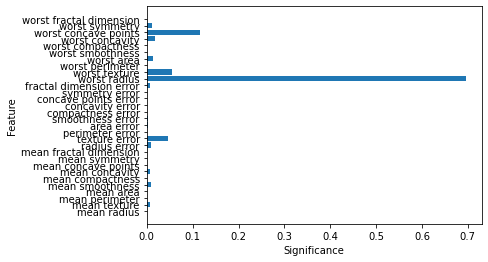

In [3]:

cancer = load_breast_cancer()
tree = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

dicto['Tree']=tree.score(X_test, y_test)

def significance_plot(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Significance")
    plt.ylabel("Feature")
    plt.rcParams["figure.figsize"] = (10,15)

significance_plot(tree)

#### <em> KMeans Clustering Classifier: </em>

In [4]:
from sklearn.neighbors import KNeighborsClassifier

kmeans = KNeighborsClassifier(n_neighbors=5)
kmeans.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(kmeans.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(kmeans.score(X_test, y_test)))

dicto['k-means']=kmeans.score(X_test, y_test)

Accuracy on training set: 0.946
Accuracy on test set: 0.930


#### <em> Logistic Regression Classifier: </em>

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

dicto['LogReg']=logreg.score(X_test, y_test)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


C:\Users\Conda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <em> Comparisons: </em>

          Models  Accuracies
Tree        Tree    0.937063
k-means  k-means    0.930070
LogReg    LogReg    0.958042


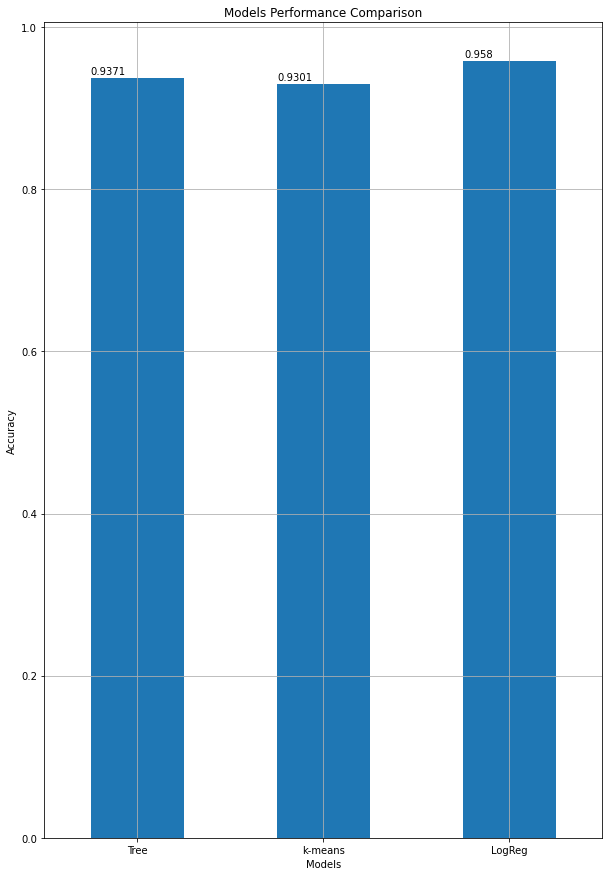

In [6]:

d=pd.DataFrame({'Models':dicto.keys(),'Accuracies':dicto.values()},index=dicto.keys())
print(d)
ax=d.plot.bar(x='Models',y='Accuracies',rot=0,title='Models Performance Comparison',grid=True,legend=False,ylabel='Accuracy')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),4), (p.get_x() * 1.005, p.get_height() * 1.005))
